In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data_dir = "/kaggle/input/jodhpur"

In [4]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=88a13079e5125ffa63e8b4c7c27a1ae16a40af5742492a2b740d8c64cd6a0d9d
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [5]:
import pandas as pd
import numpy as np
import cv2
import glob
import imutils
from imutils import paths
import os
import os.path

captcha_image = '/kaggle/input/jodhpur/111XM.jpg'
# Load the image and convert it to grayscale
image = cv2.imread(captcha_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# grab the base filename as the text
filename = os.path.basename(captcha_image)
captcha_text = os.path.splitext(filename)[0]

In [6]:

# Adding some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

# applying threshold
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]

In [7]:
captcha_text, filename

('111XM', '111XM.jpg')

In [8]:

# creating empty list for holding the coordinates of the letters
letter_image_regions = []
 
# finding the contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
  # Get the rectangle that contains the contour
  (x, y, w, h) = cv2.boundingRect(contour)
        
  # checking if any counter is too wide
  # if countour is too wide then there could be two letters joined together or are very close to each other
  if w / h > 1.25:
    # Split it in half into two letter regions
    half_width = int(w / 2)
    letter_image_regions.append((x, y, half_width, h))
    letter_image_regions.append((x + half_width, y, half_width, h))
  else:  
    letter_image_regions.append((x, y, w, h))

In [9]:

letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Save each letter as a single image
for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_text):
  # Grab the coordinates of the letter in the image
  x, y, w, h = letter_bounding_box

  # Extract the letter from the original image with a 2-pixel margin around the edge
  letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

In [ ]:
SOLVED_CAPTCHA_FOLDER = "/kaggle/input/jodhpur"
OUTPUT_FOLDER = "/kaggle/working/extracted_letters"


# Get the path of all the solved captcha images
solved_captchas = glob.glob(os.path.join(SOLVED_CAPTCHA_FOLDER, "*"))
counts = {}

# loop over the image paths
for (i, captcha) in enumerate(solved_captchas):
    print("processing image {}/{}".format(i + 1, len(solved_captchas)))

    
    # grab the base filename as the text
    filename = os.path.basename(captcha)
    captcha_text = os.path.splitext(filename)[0]

    # Load the image and convert it to grayscale
    image = cv2.imread(captcha)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Add some extra padding around the image
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # applying threshold
    thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]

     # finding the contours
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # creating empty list for holding the coordinates of the letters
    letter_image_regions = []

    # Now we will loop through each of the contours and extract the letter
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        
        # checking if any counter is too wide
        # if countour is too wide then there could be two letters joined together or are very close to each other
        if w / h > 1.25:
            # Split it in half into two letter regions
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            
            letter_image_regions.append((x, y, w, h))
            

    
    # Sort the detected letter images based on the x coordinate to make sure
    # we get them from left-to-right so that we match the right image with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    
    # Save each letter as a single image
    for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_text):
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Check if the extracted letter image is not empty
        if not letter_image.size == 0:
            # Get the folder to save the image in
            save_path = os.path.join(OUTPUT_FOLDER, letter_text)

            # creating different output folder for storing different letters
            if not os.path.exists(save_path):
                os.makedirs(save_path)

            # write the letter image to a file
            count = counts.get(letter_text, 1)
            p = os.path.join(save_path, "{}.jpg".format(str(count)))
            cv2.imwrite(p, letter_image)

            # increment the count
            counts[letter_text] = count + 1

processing image 1/113062
processing image 2/113062
processing image 3/113062
processing image 4/113062
processing image 5/113062
processing image 6/113062
processing image 7/113062
processing image 8/113062
processing image 9/113062
processing image 10/113062
processing image 11/113062
processing image 12/113062
processing image 13/113062
processing image 14/113062
processing image 15/113062
processing image 16/113062
processing image 17/113062
processing image 18/113062
processing image 19/113062
processing image 20/113062
processing image 21/113062
processing image 22/113062
processing image 23/113062
processing image 24/113062
processing image 25/113062
processing image 26/113062
processing image 27/113062
processing image 28/113062
processing image 29/113062
processing image 30/113062
processing image 31/113062
processing image 32/113062
processing image 33/113062
processing image 34/113062
processing image 35/113062
processing image 36/113062
processing image 37/113062
processing

In [18]:
letter_folder = '/kaggle/working/extracted_letters'

#creating empty lists for storing image data and labels
data = []
labels = []
for image in paths.list_images(letter_folder):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (30,30))
    
    # adding a 3rd dimension to the image
    img = np.expand_dims(img, axis = 2)
    
    #grabing the name of the letter based on the folder it is present in
    label = image.split(os.path.sep)[-2]
    
    # appending to the empty lists
    data.append(img)
    labels.append(label)

#converting data and labels to np array
data = np.array(data, dtype = "float")
labels = np.array(labels)

In [19]:
print(data.shape, labels.shape)

(311628, 30, 30, 1) (311628,)


In [20]:
#scaling the values of  data between 0 and 1
data = data/255.0

In [21]:
# Split the training data into separate train and test sets
from sklearn.model_selection import train_test_split
(train_x, val_x, train_y, val_y) = train_test_split(data, labels, test_size=0.2, random_state=0)
print(train_x.shape, val_x.shape, train_y.shape, val_y.shape)

(249302, 30, 30, 1) (62326, 30, 30, 1) (249302,) (62326,)


In [22]:
# one hot encoding our target variable 'labels'
from sklearn.preprocessing import LabelBinarizer
import pickle
lb = LabelBinarizer().fit(train_y)
train_y = lb.transform(train_y)
val_y = lb.transform(val_y)

bin = pickle.dumps(lb)
with open("captcha_labels.pickle", "wb") as f:
    pickle.dump(lb, f)

print(train_y.shape, val_y.shape)

(249302, 60) (62326, 60)


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

#building model
model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(30, 30, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(60, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# using early stoping for avoiding overfitting
estop = EarlyStopping(patience=10, mode='min', min_delta=0.001, monitor='val_loss')

model.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=32, epochs=50, verbose=1, callbacks = [estop])


Epoch 1/50
7791/7791 [==============================] - 36s 4ms/step - loss: 4.0948 - accuracy: 0.0171 - val_loss: 4.0947 - val_accuracy: 0.0171
Epoch 2/50
7791/7791 [==============================] - 34s 4ms/step - loss: 4.0946 - accuracy: 0.0165 - val_loss: 4.0947 - val_accuracy: 0.0171
Epoch 3/50
7791/7791 [==============================] - 34s 4ms/step - loss: 4.0947 - accuracy: 0.0165 - val_loss: 4.0945 - val_accuracy: 0.0173
Epoch 4/50
7791/7791 [==============================] - 35s 4ms/step - loss: 4.0947 - accuracy: 0.0167 - val_loss: 4.0949 - val_accuracy: 0.0163
Epoch 5/50
7791/7791 [==============================] - 35s 4ms/step - loss: 4.0947 - accuracy: 0.0166 - val_loss: 4.0945 - val_accuracy: 0.0167
Epoch 6/50
7791/7791 [==============================] - 34s 4ms/step - loss: 4.0947 - accuracy: 0.0167 - val_loss: 4.0946 - val_accuracy: 0.0167
Epoch 7/50
7791/7791 [==============================] - 35s 4ms/step - loss: 4.0947 - accuracy: 0.0169 - val_loss: 4.0942 - val_ac

1/1 [==============================] - 0s 19ms/step
CAPTCHA text is: ml


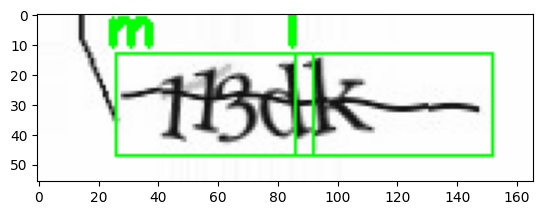

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# Load the image and convert it to grayscale
image = cv2.imread('/kaggle/input/jodhpur/113dk.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

# threshold the image
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]

# find the contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    
letter_image_regions = []

# Now we can loop through each of the contours and extract the letter

for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    
    # checking if any counter is too wide
    # if countour is too wide then there could be two letters joined together or are very close to each other
    if w / h > 1.25:
        # Split it in half into two letter regions
        half_width = int(w / 2)
        letter_image_regions.append((x, y, half_width, h))
        letter_image_regions.append((x + half_width, y, half_width, h))
    else:
        letter_image_regions.append((x, y, w, h))
            

# Sort the detected letter images based on the x coordinate to make sure
# we get them from left-to-right so that we match the right image with the right letter  

letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Create an output image and a list to hold our predicted letters
output = cv2.merge([gray] * 3)
predictions = []
    
# Creating an empty list for storing predicted letters
predictions = []
    
# Save out each letter as a single image
for letter_bounding_box in letter_image_regions:
    # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box

    # Extract the letter from the original image with a 2-pixel margin around the edge
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

    # Check if the letter_image is empty before resizing
    if not letter_image.size:
        continue  # Skip empty images

    # Resize the letter image to (30, 30)
    letter_image = cv2.resize(letter_image, (30, 30))

    # Turn the single image into a 4d list of images
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)

    # Making prediction
    pred = model.predict(letter_image)

    # Convert the one-hot-encoded prediction back to a normal letter
    letter = lb.inverse_transform(pred)[0]
    predictions.append(letter)

    # Draw the prediction on the output image
    cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1)
    cv2.putText(output, letter, (x - 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)


# Print the captcha's text
captcha_text = "".join(predictions)
print("CAPTCHA text is: {}".format(captcha_text))

# Show the annotated image
plt.imshow(output)

In [ ]:
# #Saving the model for future use
# model.save("captcha_extractor_model.hdf5")

In [28]:
test_image_folder = '/kaggle/input/jodhpur'
OUTPUT_FOLDER = '/kaggle/working/predicted_captchas'
test_captcha_images = glob.glob(os.path.join(test_image_folder, "*"))

In [ ]:
# loop over the image paths
for (i, image) in enumerate(test_captcha_images):
    print("processing image {}/{}".format(i + 1, len(test_captcha_images)))

    # Load the image and convert it to grayscale
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Add some extra padding around the image
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]

    # find the contours (continuous blobs of pixels) the image
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    letter_image_regions = []

    # Now we can loop through each of the contours and extract the letter
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        
        # checking if any counter is too wide
        # if countour is too wide then there could be two letters joined together or are very close to each other
        if w / h > 1.25:
            # Split it in half into two letter regions
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            letter_image_regions.append((x, y, w, h))
            

    
    # Sort the detected letter images based on the x coordinate to make sure
    # we get them from left-to-right so that we match the right image with the right letter  
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    
    # Creating an empty list for storing predicted letters
    predictions = []
    
    # Save out each letter as a single image
    for letter_bounding_box in letter_image_regions:
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Check if the letter_image is empty before resizing
        if not letter_image.size:
            continue  # Skip empty images

        # Resize the letter image to (30, 30)
        letter_image = cv2.resize(letter_image, (30, 30))

        # Turn the single image into a 4d list of images
        letter_image = np.expand_dims(letter_image, axis=2)
        letter_image = np.expand_dims(letter_image, axis=0)

        # Making prediction
        pred = model.predict(letter_image)

        # Convert the one-hot-encoded prediction back to a normal letter
        letter = lb.inverse_transform(pred)[0]
        predictions.append(letter)

        
    # joining predicted captcha's text
    captcha_text = "".join(predictions)
    
    # Get the folder to save the image in
    save_path = os.path.join(OUTPUT_FOLDER, captcha_text)
    
    p = os.path.join(save_path+'.jpg' )
    #writing the image to the output folder
    cv2.imwrite(p, img)

processing image 1/113062
1/1 [==============================] - 0s 17ms/step
processing image 2/113062
1/1 [==============================] - 0s 20ms/step
processing image 3/113062
1/1 [==============================] - 0s 18ms/step
processing image 4/113062
1/1 [==============================] - 0s 17ms/step
processing image 5/113062
1/1 [==============================] - 0s 19ms/step
processing image 6/113062
processing image 7/113062
1/1 [==============================] - 0s 18ms/step
processing image 8/113062
1/1 [==============================] - 0s 19ms/step
processing image 9/113062
1/1 [==============================] - 0s 17ms/step
processing image 10/113062
1/1 [==============================] - 0s 17ms/step
processing image 11/113062
1/1 [==============================] - 0s 17ms/step
processing image 12/113062
1/1 [==============================] - 0s 16ms/step
processing image 13/113062
1/1 [==============================] - 0s 17ms/step
processing image 14/113062
1/1 [==